In [28]:
import pandas as pd
data = pd.read_csv('Sample - Superstore.csv')
data_returns = pd.read_csv('returns.csv')

data.head()
#data_returns.head()

#Merge two dataframes
#data_merge = pd.merge(data, data_returns, on= 'Order ID')
#data_merge['Order ID'].value_counts()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [29]:
data_concat = pd.concat([data, data_returns])
data_concat['Order ID'].value_counts()


Order ID
CA-2017-100111    15
CA-2016-165330    12
CA-2017-157987    12
US-2016-108504    11
US-2015-126977    10
                  ..
CA-2017-103506     1
CA-2016-132479     1
CA-2017-160724     1
CA-2017-156412     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64

In [47]:
'''What is the avg difference between ship date and order date on items that were returned? '''
from datetime import datetime

#Inner join both datasets on Order ID  
#Filter for orders that were returned

data_joined = pd.merge(data, data_returns, how='inner', on='Order ID')

#data_joined.dtypes
data_joined.head()

data_filter = data_joined[data_joined['Returned'] == 'Yes']

data_filter.shape

#Now convert date to datetime
#data_filter.dtypes
data_filter['Order Date'] = pd.to_datetime(data_filter['Order Date'])
data_filter['Ship Date'] = pd.to_datetime(data_filter['Ship Date'])

#data_filter.dtypes

#Now we need the difference between order and ship 

data_filter['Ship Delay'] = data_filter['Ship Date'] - data_filter['Order Date']
#data_filter.head()

data_filter['Ship Delay'].describe()


/var/folders/_c/7ddzw5qx2ts_qln_wcy502340000gn/T/ipykernel_15253/2582232730.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_filter['Order Date'] = pd.to_datetime(data_filter['Order Date'])
/var/folders/_c/7ddzw5qx2ts_qln_wcy502340000gn/T/ipykernel_15253/2582232730.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['Order Date'] = pd.to_datetime(data_filter['Order Date'])
/var/folders/_c/7ddzw5qx2ts_qln_wcy502340000gn/T/ipykernel_15253/2582232730.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is cons

count                          798
mean     3 days 20:03:36.541353383
std      1 days 21:41:51.231903483
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Ship Delay, dtype: object

In [54]:
"""Which region had the most orders returned?"""
#Inner join on returned
#filter for Yes
#

data_region_filter = pd.merge(data, data_returns, how='inner', on="Order ID")
#data_region_filter.head()

data_region_filter_returned = data_region_filter[data_region_filter['Returned'] == "Yes"]
data_region_filter_returned.shape

data_region_filter_returned['Region'].value_counts()

Region
West       490
East       147
Central     92
South       69
Name: count, dtype: int64

In [67]:
'''Rank the cities in descending order of the number of orders made'''

data.head()

data['City'].value_counts()

city_count = data['City'].value_counts()
city_count.head(20)



City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: count, dtype: int64

In [84]:
"""Find a list of cities that shipped orders 3 days in a row. E.g., 3/1/2016, 3/2/2016, 3/3/2017"""

#convert to date time
data.head()

data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data.dtypes

#Group by cities and ship date

data_grouped = data.groupby('City')['Ship Date'].transform('nunique')
data_grouped

cities_3_days_in_a_row = data_grouped.loc[data_grouped >= 3, 'City'].unique()


IndexingError: Too many indexers

In [94]:
"""What are the top 3 states by profits?"""

#group states by profit
data.head()
data_profits = data.groupby('Region')['Profit'].sum()
data_profits.sort_values(ascending= False).head(3)

Region
West     108418.4489
East      91522.7800
South     46749.4303
Name: Profit, dtype: float64

In [98]:
"""What is the average number of unique Customer Names by Category?"""

data_unique_names = data.groupby("Category")['Customer Name'].nunique().mean()
data_unique_names
data['Category'].nunique()

3

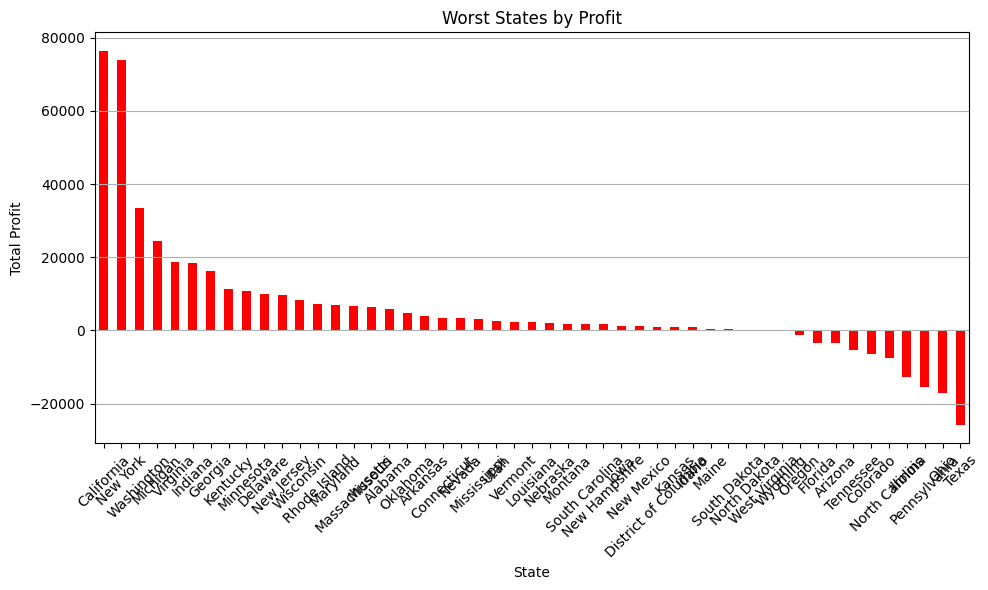

In [105]:
import matplotlib.pyplot as plt

data_worst_state = data.groupby('State')['Profit'].sum()

data_worst_state = data_worst_state.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
data_worst_state.plot(kind='bar', color='red')
plt.title('Worst States by Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization
plt.tight_layout()
plt.show()